In [2]:
# import api for access google bigquery
from google.cloud import bigquery as bq
# import for getting details for authentication and project id
import google.auth
# import for data maniuplation
import pandas as pd
import numpy as np
# import for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# access data from bigquery
# get project id from goolge auth
credentials, project_id = google.auth.default()
database_id = 'data'
table_id = 'fed_rate'
# get data by SQL query
client = bq.Client()
sql = f'select * from {project_id}.{database_id}.{table_id} order by date'
# save it into pandas dataframe
df = client.query(sql).to_dataframe().set_index('date')

In [4]:
# define a dataframe to store finanical issue
df_financial_issue = pd.DataFrame({
    'start_date': pd.to_datetime(['2020-01-01', '2007-01-01', '1998-01-01', '1986-01-01', '1979-01-01', '1973-10-01', '1950-01-01']),
    'end_date': pd.to_datetime(['2023-05-01','2010-03-01','2000-03-01','1995-12-01','1981-02-01','1974-03-01','1970-01-01',]),
    'name': ['COVID-19 \nPandemic', 'Subprime \nMortgage \nCrisis', 'Dot-Com \nBubble', 'Savings \n& Loan \nCrisis', '2nd Oil \nCrisis', '1st Oil \nCrisis', 'Post–World \nWar II \nEconomic \nExpansion']})

In [5]:
from matplotlib.ticker import AutoMinorLocator

def plot_with_issue(df, title="",x_label="", y_label="", df_issue=pd.DataFrame()):
    # Define a dictionary to store issue name, period (end date only), 
    # location of issue text and location of arrow head
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df, marker='o', markersize=1, markerfacecolor='black', markeredgecolor='black')
    xticks_start = df.index[0] - pd.offsets.DateOffset(years=5)
    xticks_end = df.index[-1] + pd.offsets.DateOffset(years=5)
    xticks = pd.date_range(xticks_start, xticks_end, freq='5YS')
    xlabels = [i.strftime("%b %Y") for i in xticks]
    ax.set(title=title,
           xlabel=x_label,
           ylabel=y_label,
           xlim=(xticks[0], xticks[-1]), 
           ylim=(0, ax.get_ylim()[1] * 1.3))
    ax.set_xticks(xticks, xlabels, rotation=90, ha='center')
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.grid(True, which='both')
    ylim = ax.get_ylim()[1]

    if not df_issue.empty:
        df_issue = df_issue.copy()
        df_issue['middle_date'] = df_issue['start_date'] + (df_issue['end_date'] - df_issue['start_date']) / 2
        for i in range(len(df_issue)):
            ax.axvspan(df_issue['start_date'].iloc[i], 
                       df_issue['end_date'].iloc[i],
                       color='lightcoral', alpha=0.5)
            ax.annotate(df_issue['name'].iloc[i],
                        xytext=(df_issue['middle_date'].iloc[i], 18.5 / 20 * ylim),
                        ha='center', 
                        va='center',
                        xycoords = 'data',
                        xy=(df_issue['middle_date'].iloc[i], 15 / 20 * ylim),
                        arrowprops=dict(facecolor='red', alpha=0.5))

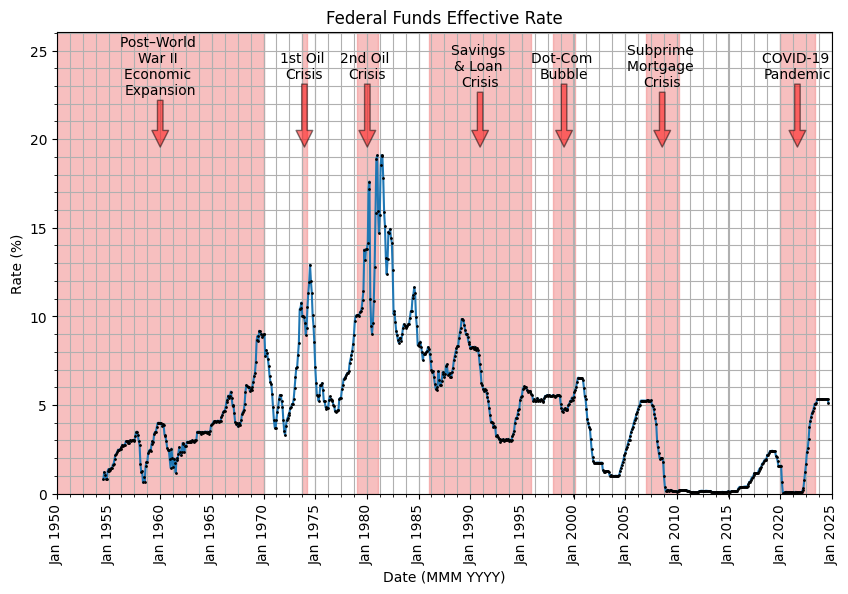

In [6]:
# simple plot with finanical issue
title_df = 'Federal Funds Effective Rate'
y_label_df = 'Rate (%)'
x_label_df = 'Date (MMM YYYY)'
plot_with_issue(df=df, title=title_df, x_label=x_label_df, y_label=y_label_df, df_issue=df_financial_issue)

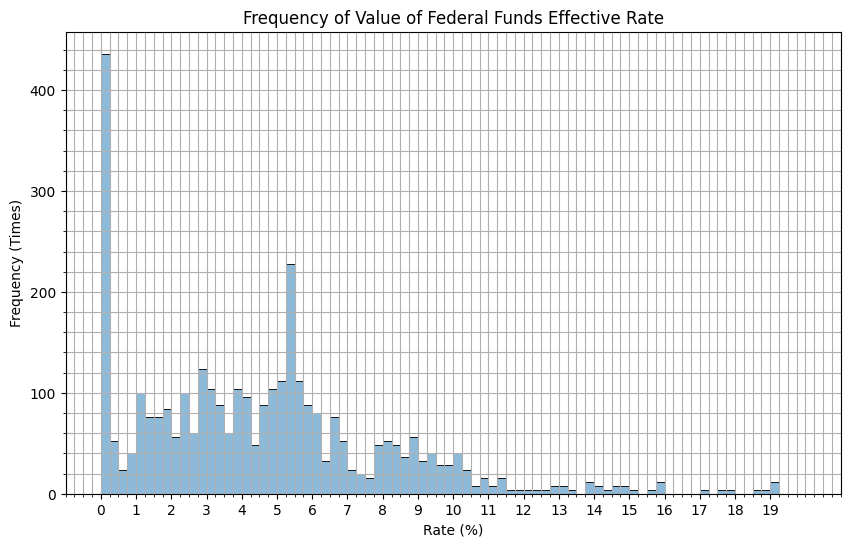

In [33]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.histplot(df, stat='frequency', binwidth=0.25, binrange=(0,20), legend=False)
# ax.set_title('Frequency of Value of Federal Funds Effective Rate')
ax.set(title='Frequency of Value of Federal Funds Effective Rate',
       xlabel='Rate (%)',
       ylabel='Frequency (Times)')
ax.set_xticks(range(20))
ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.xaxis.set_minor_locator(AutoMinorLocator(n=4))
ax.grid(True, which='both')

In [7]:
describe_list = ['min', '25%', '50%', '75%', 'max']

In [8]:
describle_dict = {item: round(df.describe().loc[item][0],2) for item in describe_list} 

In [13]:
describle_dict['outlier'] = describle_dict['max']

In [14]:
IQR = describle_dict['75%'] - describle_dict['25%']

In [15]:
describle_dict['max'] = round(IQR * 1.5 + describle_dict['75%'],2)

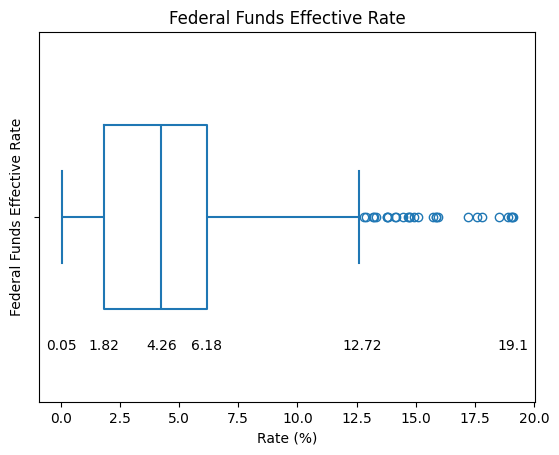

In [24]:
ax = sns.boxplot(df.rename(columns={'fed_rate':''}), orient='h', fill=False, width=.5)
ax.set(title='Federal Funds Effective Rate',
       xlabel='Rate (%)',
       ylabel='Federal Funds Effective Rate')

for item in describle_dict:
    ax.annotate(str(describle_dict[item]), 
                xy=(describle_dict[item], 0.35), 
                ha='center', va='center', 
                xycoords = 'data',
                arrowprops=dict(facecolor='red', alpha=0.5))